# <font color=blue> Advance Regression Assignment - </font><font color=green> House Price Prediction </font>

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know:

* Which variables are significant in predicting the price of a house, and

* How well those variables describe the price of a house.

# This assignment contains two parts.

# Part 1 - programming assignment

In [854]:
#Importing libraries

#Basic libraries
import pandas as pd
import numpy as np
import os

# handling warnings
import warnings
warnings.filterwarnings('ignore')

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm  

#Statistics
from scipy import stats
from scipy.stats import norm, skew 

#Data modelling libraries 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor



### 1.1 Import and read the data

In [855]:
#Read the data and creating the dataframe
housing_df=pd.read_csv("/kaggle/input/traincsv/train.csv")
housing_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


### 1.2 get some initial information on data

In [856]:
# lenth of data
len(housing_df)

1460

In [857]:
# Check if data is loaded or not
housing_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [858]:
# inspect the first five rows of data
housing_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [859]:
# check the no of rows and columns
housing_df.shape

(1460, 81)

In [860]:
# gain insights of housing data
housing_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [861]:
#Get housing data all information along with types
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [862]:
#List of columns in the data frame
housing_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# 2. Data Cleaning 

### 2.1 Remove missing values from columns

In [863]:
#Check for any null values are present in the data column wise
housing_df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

**It has been oberved that there is null values in data**

In [864]:
# The Id columns doesn't add value much so dropping that column
housing_df.drop(columns=["Id"],inplace=True)

In [865]:
#Check the count of missing values and it's percentage
total_missing_values = housing_df.isnull().sum().sort_values(ascending = False)
total_missing_values_percentage = (100*housing_df.isnull().sum()/housing_df.shape[0]).sort_values(ascending = False)
housing_df_missing_values = pd.concat([total_missing_values,total_missing_values_percentage], axis=1, keys=['Total_missing_values', 'Missing_values_percentage'])
housing_df_missing_values.head(80)


,Total_missing_values,Missing_values_percentage
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
MasVnrType,872,59.726027
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageYrBlt,81,5.547945
GarageCond,81,5.547945
GarageType,81,5.547945


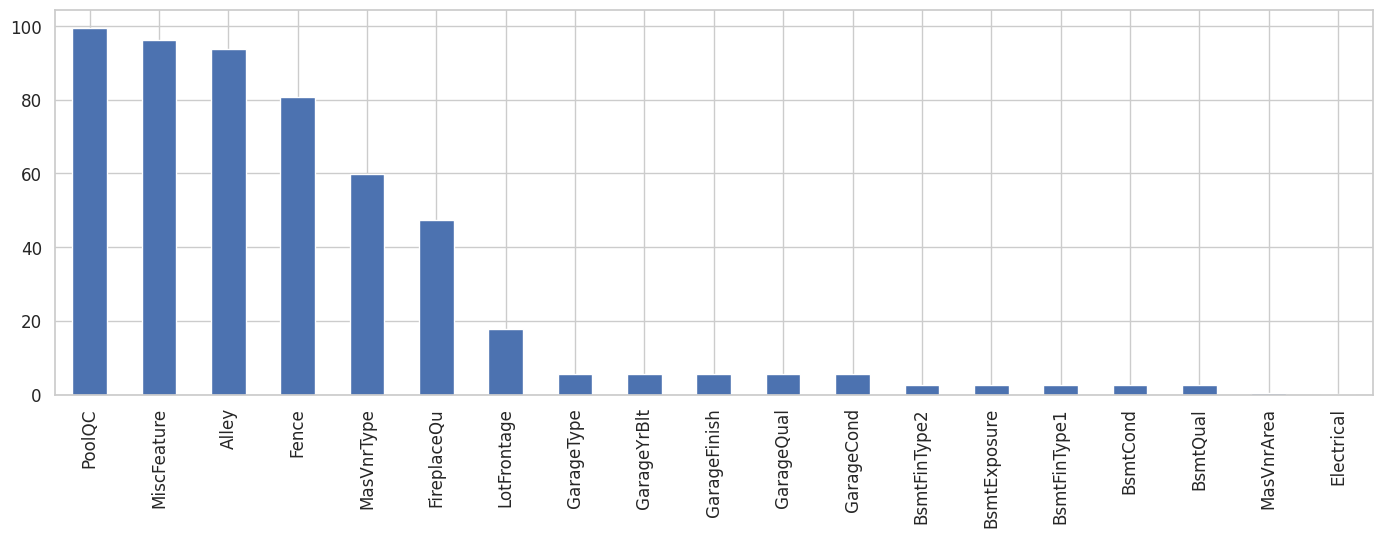

In [866]:
# Barplot for Percentages of missing values
plt.figure(figsize=[17,5])
round((housing_df[housing_df.columns[housing_df.isnull().any()]].isnull().sum()/len(housing_df))*100,2).sort_values(ascending=False).plot.bar()
plt.show()


**Checking how many columns have more than 45% of missing data**

In [867]:
# threshold for the percentage of missing data
threshold = 40

# Calculate the percentage of missing data for each column
missing_percentage = (100 * housing_df.isnull().sum() / len(housing_df))

# Create a boolean mask to identify columns with more than the threshold percentage of missing data
columns_with_high_missing = missing_percentage > threshold

# Count the number of columns that meet the threshold
num_columns_with_high_missing = columns_with_high_missing.sum()

# Print the result
print(f"Number of columns with more than {threshold}% missing data: {num_columns_with_high_missing}")

Number of columns with more than 40% missing data: 6


**It has been observed that 6 columns has more than 40% missing data, so i am going to drop them**

In [868]:
#Updated housing dataframe after removing all those columns with data missing < 40% for our further analysis

housing_df = housing_df.loc[:,(100*housing_df.isnull().sum()/housing_df.shape[0]).sort_values(ascending = False) < 40]
housing_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [869]:
# lenth of data after dropping columns having more than 40% missing values
len(housing_df)

1460

**It has been oberved that length of data will still remain same as we dropped useless columns**

In [870]:
# check the shape of data (no of rows and columns) after dropping columns having more than 40% missing values
housing_df.shape

(1460, 74)

In [871]:
# Check the head of the dataset after dropping columns having more than 40% missing values
housing_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


**It has been observed from previous analyses that we have dropped columns with more than 40% missing data. However, there are some other columns that also have missing values, so we need to perform imputation. In the imputation process, we will fill in or replace the missing data in the dataset with estimated or calculated values**

**2.2 Data Imputation**

In [872]:
#Check the no of unique values in each column
housing_df.nunique()

MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
Street              2
LotShape            4
LandContour         4
Utilities           2
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        15
Exterior2nd        16
MasVnrArea        327
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            4
BsmtCond            4
BsmtExposure        4
BsmtFinType1        6
BsmtFinSF1        637
BsmtFinType2        6
BsmtFinSF2        144
BsmtUnfSF         780
TotalBsmtSF       721
Heating             6
HeatingQC           5
CentralAir          2
Electrical          5
1stFlrSF          753
2ndFlrSF          417
LowQualFinSF       24
GrLivArea         861
BsmtFullBath        4
BsmtHalfBa

### 2.2.1 Data Imputation For Numerical Columns

**Since the column is numerical so we will be using median() to replace the missing values**

In [873]:
# Impute "LotFrontage" column with Median value
housing_df['LotFrontage'].fillna(housing_df['LotFrontage'].median(),inplace=True)

In [874]:
# Impute "GarageYrBlt" column with Median value
housing_df['GarageYrBlt'].fillna(housing_df['GarageYrBlt'].median(), inplace=True)

In [875]:
# Impute "MasVnrArea" column with Median value
housing_df['MasVnrArea'].fillna(housing_df['MasVnrArea'].median(), inplace=True)

### 2.2.2 Data Imputation For Categorical Columns

#### Since the column is categorical so we will be using mode() to replace the missing values

In [876]:
# Impute "Electrical" with Mode value
value = housing_df['Electrical'].mode()[0]
housing_df['Electrical'].fillna(value, inplace=True)

### 2.2.3 Data Imputation for those columns which 'NA' meaningful value (For e.g. `GarageType` = NA refers to "No Garage"). We will replace these values with `None`

In [877]:
# Impute "GarageType" with 'None' as it has a meaningful value
housing_df['GarageType'].fillna('None', inplace=True)

In [878]:
# Impute "GarageFinish" with 'None' as it has a meaningful value
housing_df['GarageFinish'].fillna('None', inplace=True)

In [879]:
# Impute "GarageQual" with 'None' as it has a meaningful value
housing_df['GarageQual'].fillna('None', inplace=True)

In [880]:
# Impute "GarageQual" with 'None' as it has a meaningful value
housing_df['GarageCond'].fillna('None', inplace=True)

In [881]:
# Impute "BsmtExposure" with 'None' as it has a meaningful value
housing_df['BsmtExposure'].fillna('None', inplace=True)

In [882]:
# Impute "BsmtFinType2" with 'None' as it has a meaningful value
housing_df['BsmtFinType2'].fillna('None', inplace=True)

In [883]:
# Impute "BsmtFinType1" with 'None' as it has a meaningful value
housing_df['BsmtFinType1'].fillna('None', inplace=True)

In [884]:
# Impute "BsmtCond" with 'None' as it has a meaningful value
housing_df['BsmtCond'].fillna('None', inplace=True)

In [885]:
# Impute "BsmtQual" with 'None' as it has a meaningful value
housing_df['BsmtQual'].fillna('None', inplace=True)

In [886]:
#Final check of missing values 
total_missing_values = housing_df.isnull().sum().sort_values(ascending = False)
total_missing_values_percentage = (100*housing_df.isnull().sum()/housing_df.shape[0]).sort_values(ascending = False)
housing_df_missing_values = pd.concat([total_missing_values,total_missing_values_percentage], axis=1, keys=['Total_missing_values', 'Missing_values_percentage'])
housing_df_missing_values

,Total_missing_values,Missing_values_percentage
MSSubClass,0,0.0
GarageYrBlt,0,0.0
Fireplaces,0,0.0
Functional,0,0.0
TotRmsAbvGrd,0,0.0
KitchenQual,0,0.0
KitchenAbvGr,0,0.0
BedroomAbvGr,0,0.0
HalfBath,0,0.0
FullBath,0,0.0


**After imputation it has been oberseved that now there is no null values in data**

In [887]:
housing_df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPor

In [888]:
# Calculate the age of each property by subtracting the year of remodeling/renovation from the year it was sold
housing_df['Age'] = housing_df['YrSold'] - housing_df['YearRemodAdd']

# Display the first few rows of the 'Age' column to show the calculated ages
housing_df['Age'].head()

0     5
1    31
2     6
3    36
4     8
Name: Age, dtype: int64

In [889]:
# Drop the specified columns which are irrelevant from the DataFrame 'housing_df'
# The columns to be dropped are 'YrSold', 'MoSold', 'YearBuilt', and 'YearRemodAdd'
housing_df = housing_df.drop(['YrSold', 'MoSold', 'YearBuilt', 'YearRemodAdd'], axis=1)

# 3. Exploratory Data Analysis

## First, divide the columns into numerical and categorical columns

In [890]:
#numeric columns 
numeric_columns = housing_df.select_dtypes(exclude='object').columns
numeric_columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice', 'Age'],
      dtype='object')

In [891]:
#categorical columns 
categorical_columns = housing_df.select_dtypes(include='object').columns
categorical_columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')

# 3.1 Univariate Analysis

### 3.1.1 Univariate Analysis on numerical columns

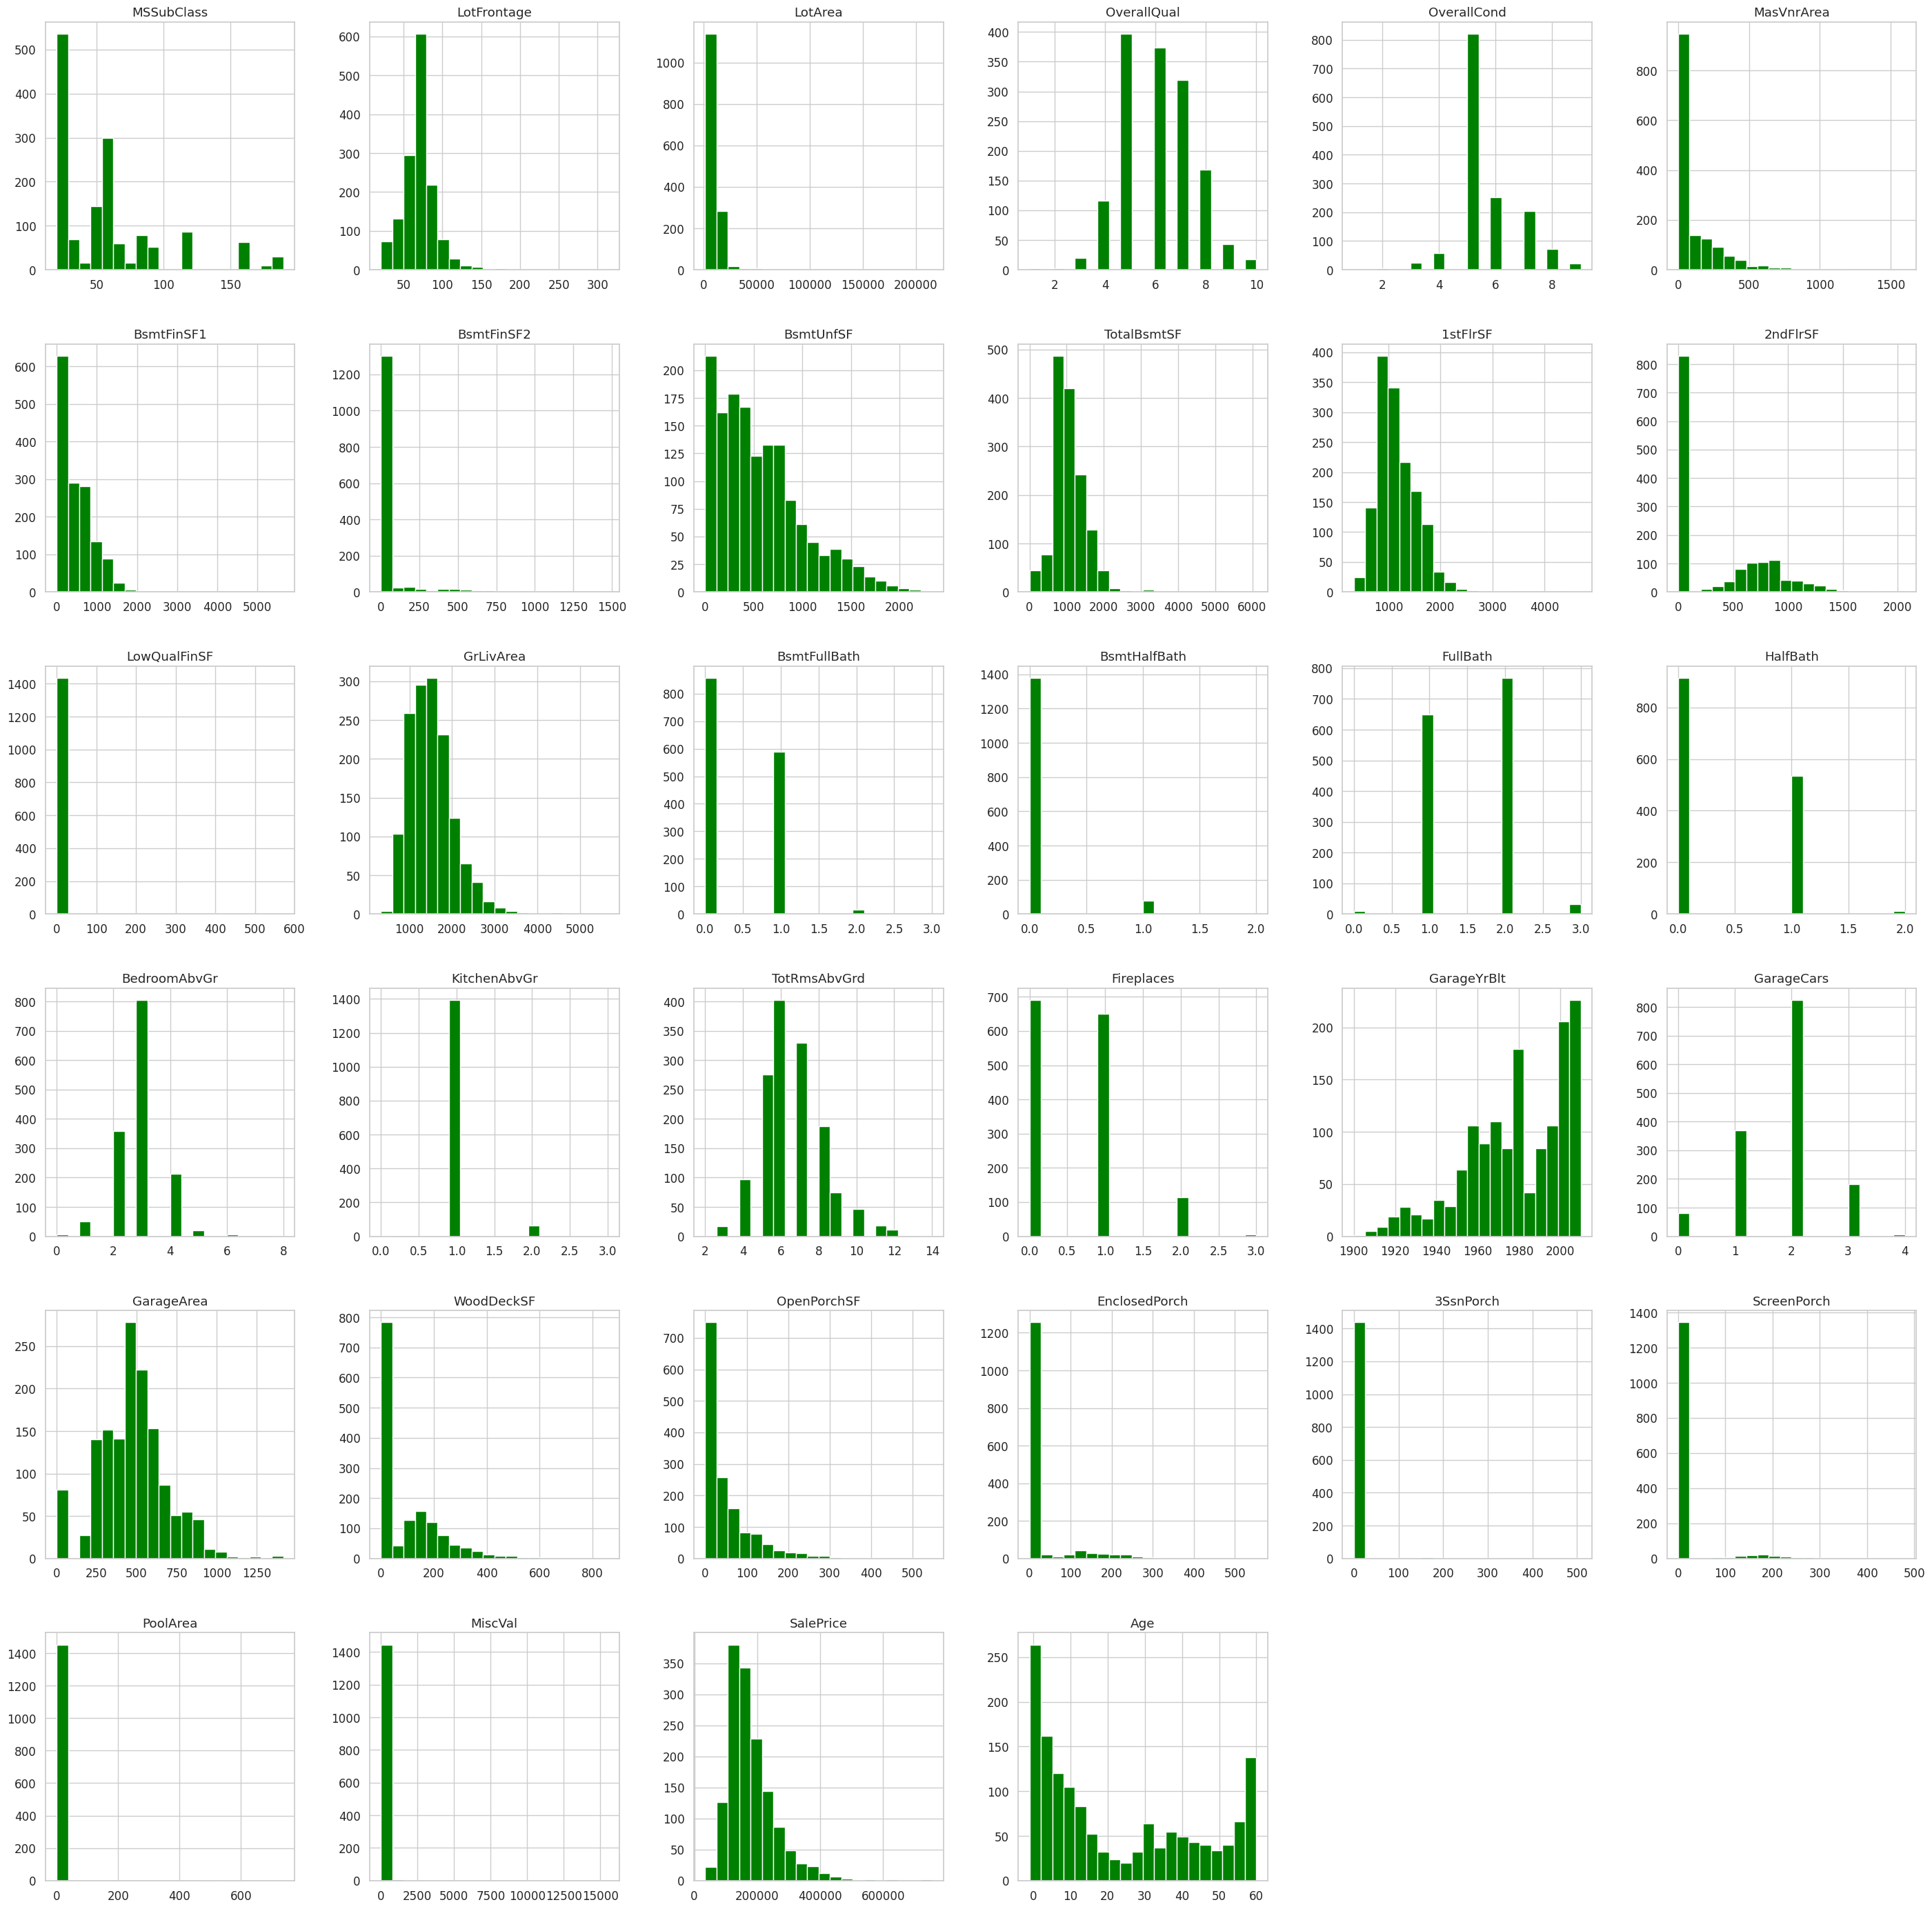

In [892]:
# Plot histograms for numeric columns with specified colors
housing_df[numeric_columns].hist(bins=20, figsize=(35, 35), color = 'green')

# Display the plot
plt.show()

### Inferences

We observe that some variables exhibit a high degree of skewness in their distributions. This skewness suggests that these variables may be correlated with each other. However, drawing conclusions about the potential correlations solely from univariate analysis can be challenging

### 3.1.2 Calculate the correlation matrix between numerical columns

In [893]:
# correlation matrix
correlation_matrix = housing_df[numeric_columns].corr()
correlation_matrix

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,Age
MSSubClass,1.000000,-0.356718,-0.139781,0.032628,-0.059316,0.023573,-0.069836,-0.065649,-0.140759,-0.238518,...,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.084284,-0.041968
LotFrontage,-0.356718,1.000000,0.304522,0.234812,-0.053281,0.178469,0.214367,0.042463,0.124098,0.363472,...,0.323511,0.075542,0.137014,0.010287,0.061945,0.037655,0.180819,-0.000255,0.334771,-0.082957
LotArea,-0.139781,0.304522,1.000000,0.105806,-0.005636,0.103321,0.214103,0.111170,-0.002618,0.260833,...,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.263843,-0.014709
OverallQual,0.032628,0.234812,0.105806,1.000000,-0.091932,0.407252,0.239666,-0.059119,0.308159,0.537808,...,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.790982,-0.552570
OverallCond,-0.059316,-0.053281,-0.005636,-0.091932,1.000000,-0.125694,-0.046231,0.040229,-0.136841,-0.171098,...,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.077856,-0.070931
MasVnrArea,0.023573,0.178469,0.103321,0.407252,-0.125694,1.000000,0.261256,-0.071330,0.113862,0.360067,...,0.370884,0.159991,0.122528,-0.109907,0.019144,0.062248,0.011928,-0.029512,0.472614,-0.177105
BsmtFinSF1,-0.069836,0.214367,0.214103,0.239666,-0.046231,0.261256,1.000000,-0.050117,-0.495251,0.522396,...,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,0.386420,-0.127556
BsmtFinSF2,-0.065649,0.042463,0.111170,-0.059119,0.040229,-0.071330,-0.050117,1.000000,-0.209294,0.104810,...,-0.018227,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.011378,0.069814
BsmtUnfSF,-0.140759,0.124098,-0.002618,0.308159,-0.136841,0.113862,-0.495251,-0.209294,1.000000,0.415360,...,0.183303,-0.005316,0.129005,-0.002538,0.020764,-0.012579,-0.035092,-0.023837,0.214479,-0.183830
TotalBsmtSF,-0.238518,0.363472,0.260833,0.537808,-0.171098,0.360067,0.522396,0.104810,0.415360,1.000000,...,0.486665,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.613581,-0.292096


### 3.1.3 Visualise correlation matrix on a heatmap

***Heatmap is a common and effective way to visualize a correlation matrix between numerical columns. Heatmaps provide a visual representation of the correlation coefficients, making it easier to identify patterns and relationships between variables***

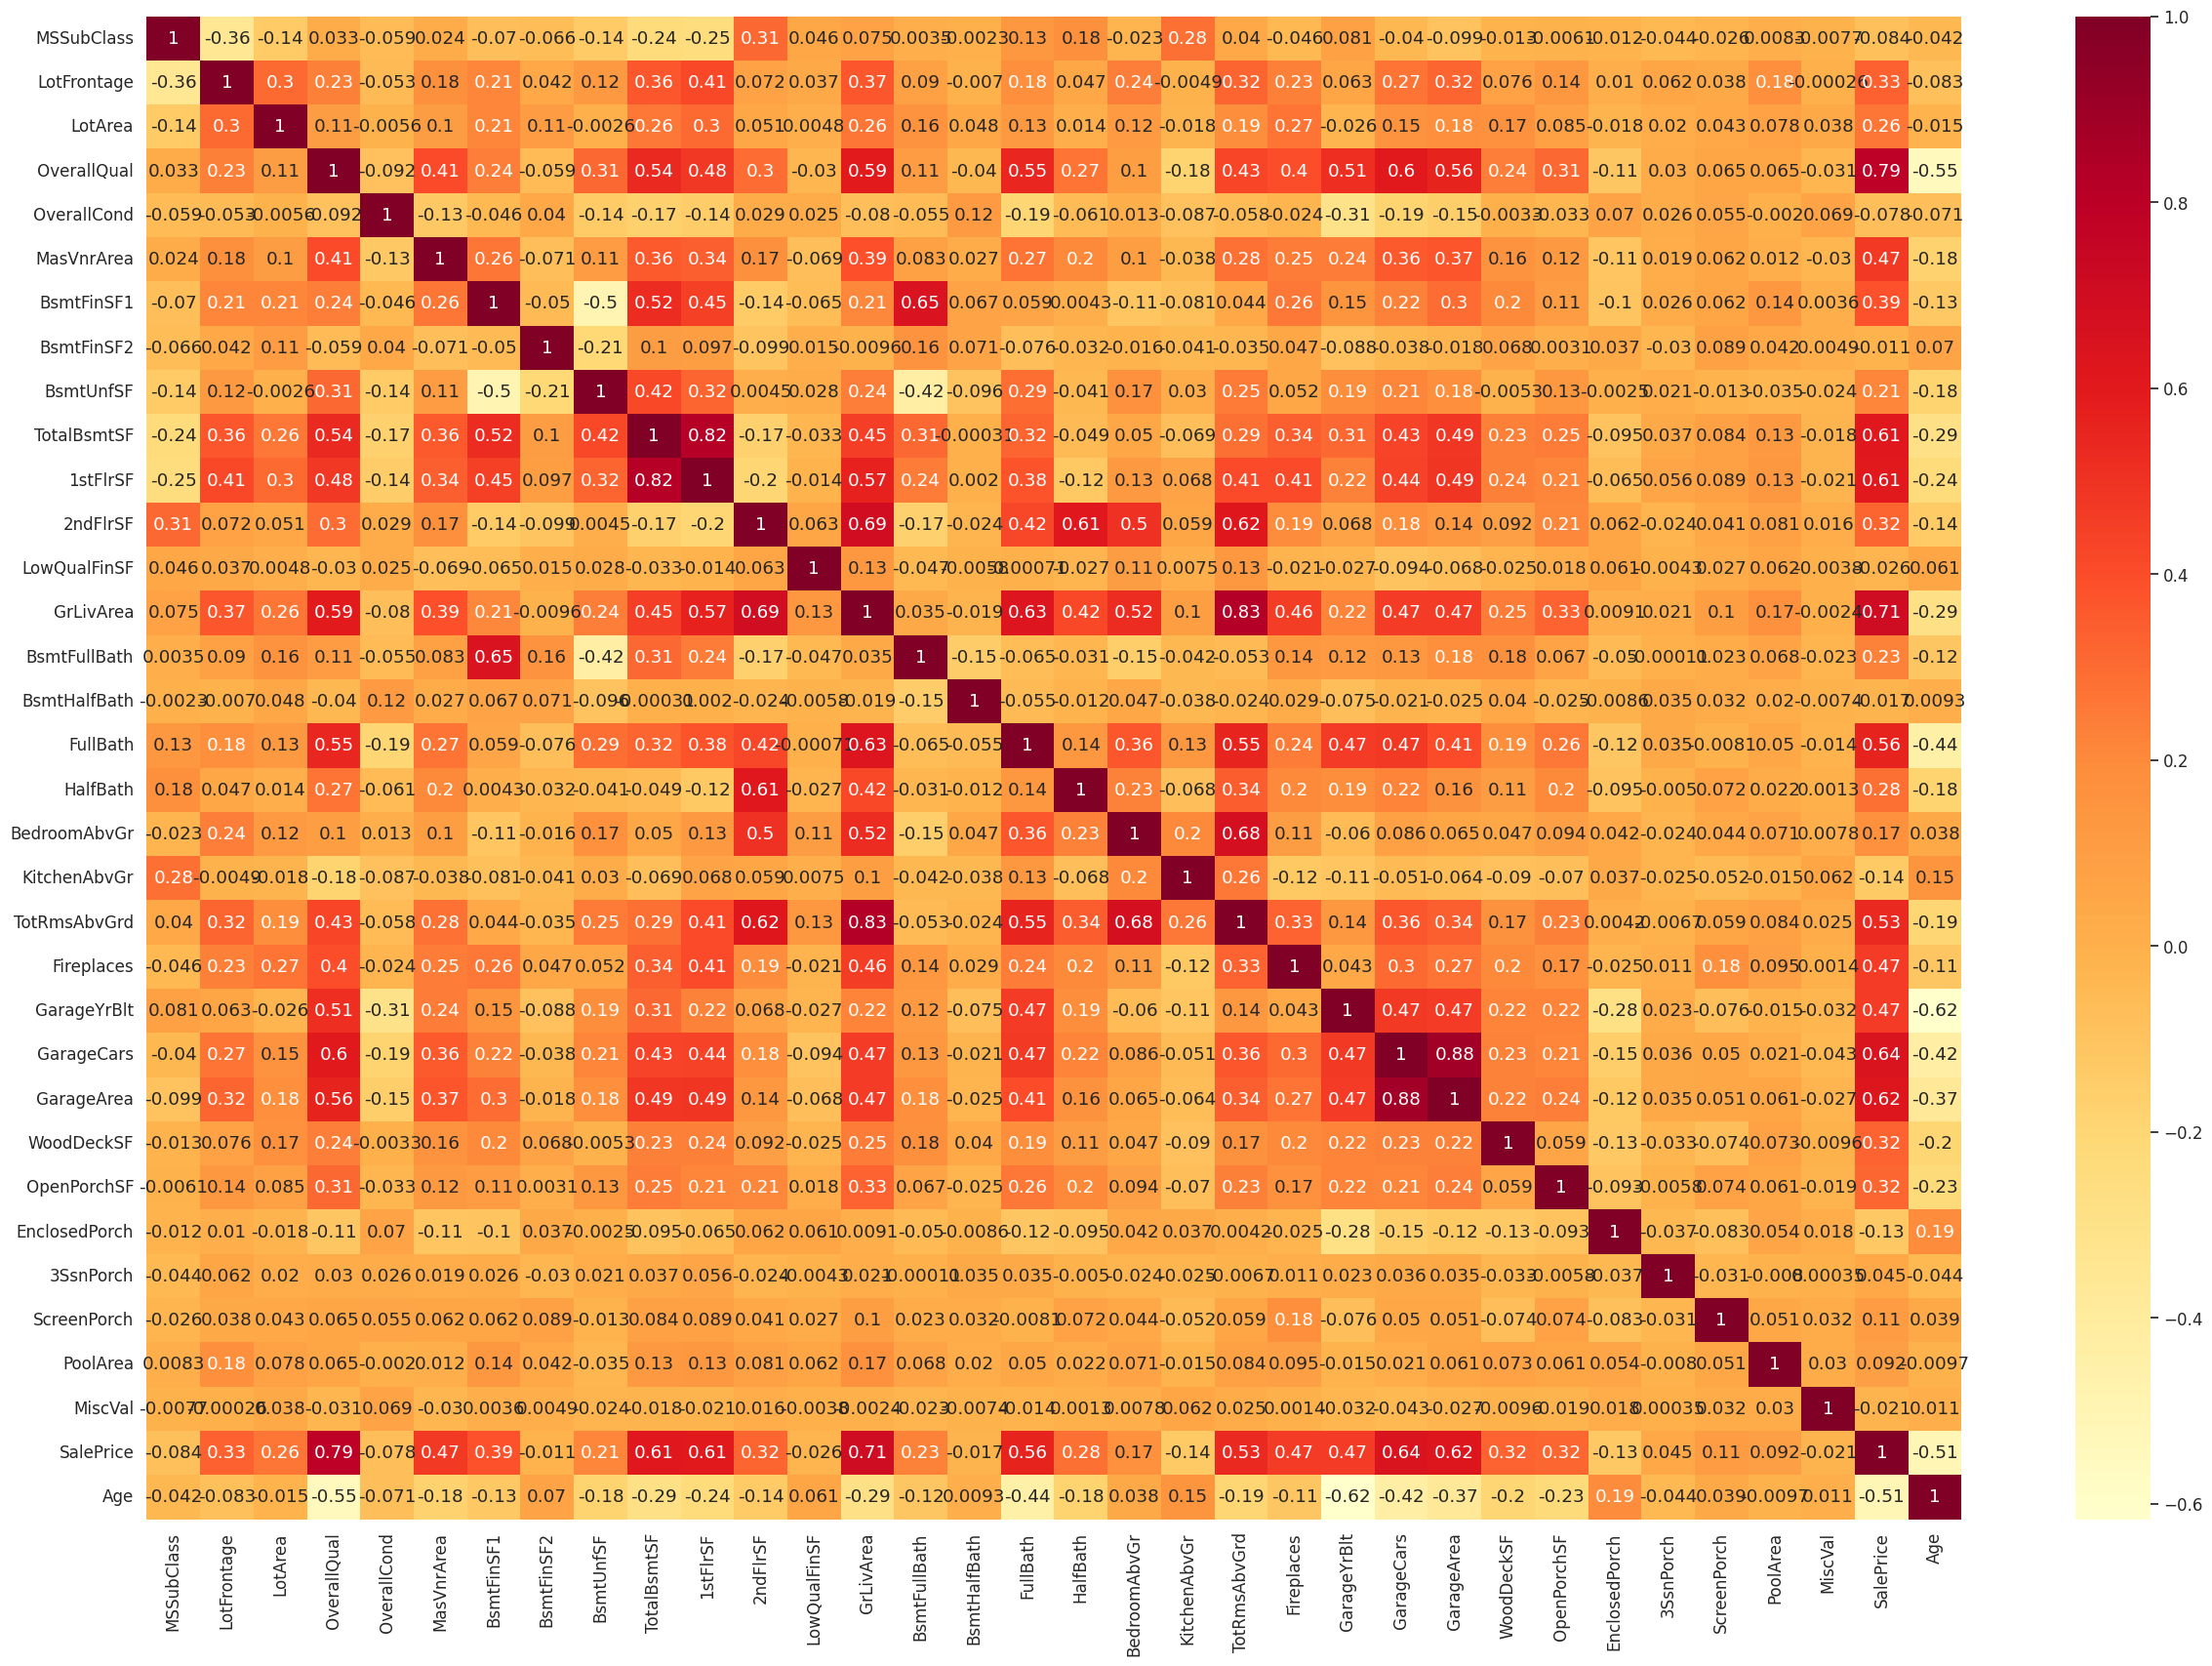

In [894]:
# Visualising correlations on a heatmap

# Figure size
plt.figure(figsize=(30,20))

# Heatmap
sns.heatmap(correlation_matrix, cmap="YlOrRd", annot=True)

# Display the plot
plt.show()


### Inferences: 

 #### Based on the above observations, we can draw the following conclusions:


* SalePrice exhibits a strong positive correlation with Overall Quality **(0.79)**.
* SalePrice demonstrates a substantial positive correlation with TotalBsmtSF **(0.61)**.
* SalePrice displays a significant positive correlation with 1stFlrSF **(0.61)**.
* SalePrice shows a noteworthy positive correlation with GrLivArea **(0.71)**.
* SalePrice is positively correlated with FullBath, with a coefficient of **(0.58)**.
* SalePrice is positively correlated with TotRmsAbvGrd, with a coefficient of **(0.55)**.
* SalePrice displays a considerable positive correlation with GarageCars **(0.64)**.
* SalePrice exhibits a significant positive correlation with GarageArea **(0.62)**.
* SalePrice is negatively correlated with Age, with a coefficient of **(-0.5)**.**

# 3.2 Bivariate Analysis

### 3.2.1 Using a pairplot, we conducted bivariate analysis to explore the relationships between SalePrice and the top 10 correlated variables**

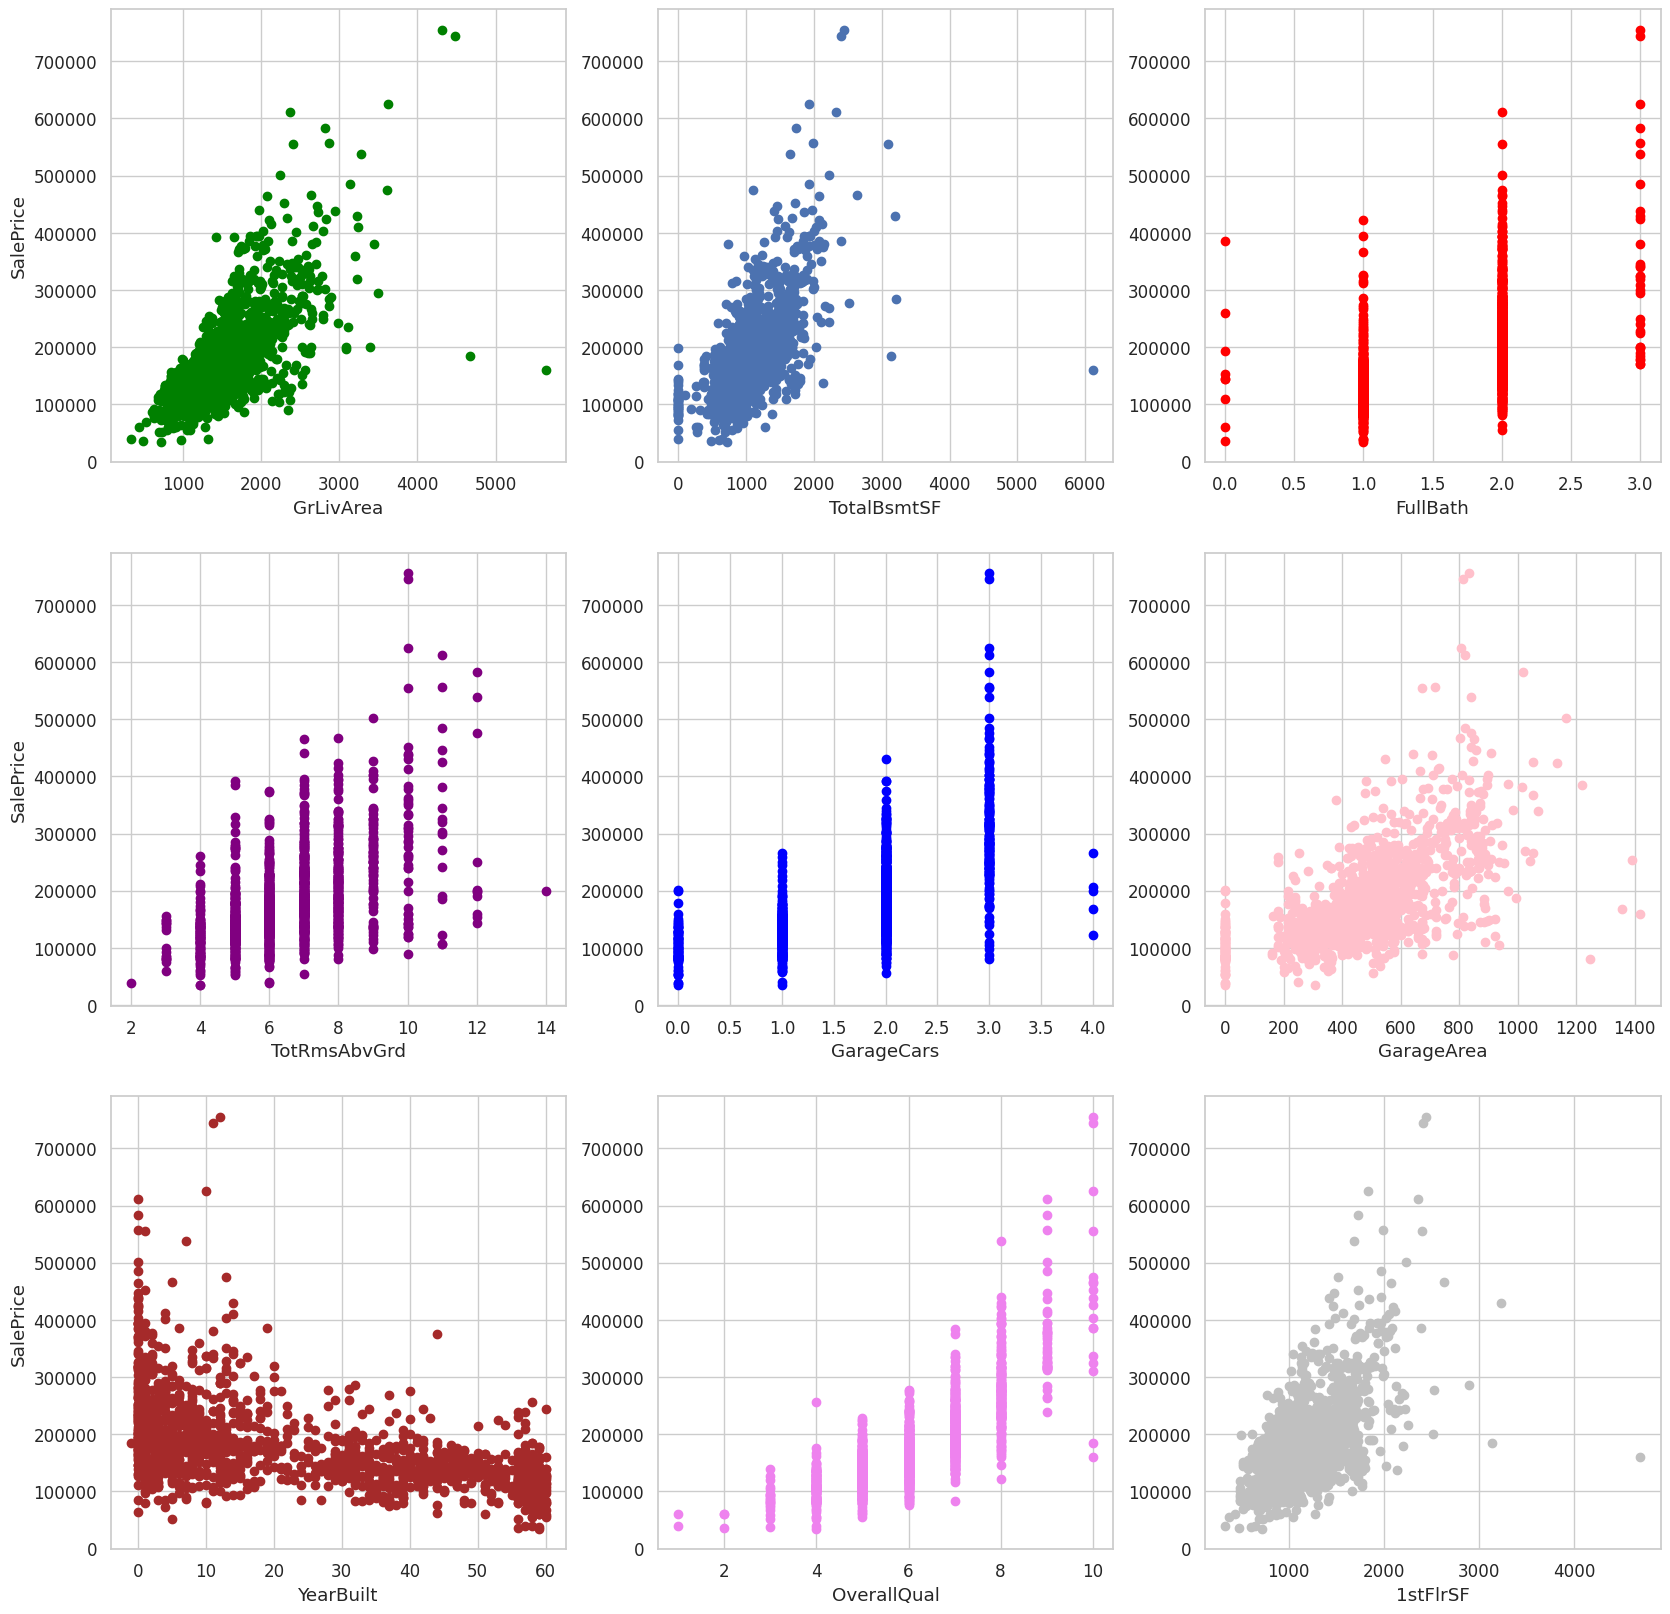

In [895]:
# Set the figure size for the entire grid of subplots
plt.figure(figsize=(20, 20))

# Create a subplot grid with 3 rows and 3 columns
# Each subplot will be placed in a specific location (row, column)
plt.subplot(3, 3, 1)  # First subplot
# Create a scatter plot of GrLivArea vs. SalePrice
plt.scatter(housing_df.GrLivArea, housing_df.SalePrice, color='green')
# Set the x-axis label
plt.xlabel('GrLivArea')
# Set the y-axis label
plt.ylabel('SalePrice')

# Repeat the above steps for the other subplots

plt.subplot(3, 3, 2)  # Second subplot
plt.scatter(housing_df.TotalBsmtSF, housing_df.SalePrice)
plt.xlabel('TotalBsmtSF')

plt.subplot(3, 3, 3)  # Third subplot
plt.scatter(housing_df.FullBath, housing_df.SalePrice, color='red')
plt.xlabel('FullBath')

plt.subplot(3, 3, 4)  # Fourth subplot
plt.scatter(housing_df.TotRmsAbvGrd, housing_df.SalePrice, color='purple')
plt.xlabel('TotRmsAbvGrd')
plt.ylabel('SalePrice')

plt.subplot(3, 3, 5)  # Fifth subplot
plt.scatter(housing_df.GarageCars, housing_df.SalePrice, color='blue')
plt.xlabel('GarageCars')

plt.subplot(3, 3, 6)  # Sixth subplot
plt.scatter(housing_df.GarageArea, housing_df.SalePrice, color='pink')
plt.xlabel('GarageArea')

plt.subplot(3, 3, 7)  # Seventh subplot
plt.scatter(housing_df.Age, housing_df.SalePrice, color='brown')
plt.xlabel('YearBuilt')
plt.ylabel('SalePrice')

plt.subplot(3, 3, 8)  # Eighth subplot
plt.scatter(housing_df.OverallQual, housing_df.SalePrice, color='violet')
plt.xlabel('OverallQual')

plt.subplot(3, 3, 9)  # Ninth subplot
plt.scatter(housing_df['1stFlrSF'], housing_df.SalePrice, color='silver')
plt.xlabel('1stFlrSF')

# Show the entire grid of subplots
plt.show()
 

### Inferences: 

 #### Based on the above observations, we can draw the following conclusions:

- We observe a substantial degree of linear correlation between **SalePrice** and the majority of the variables, indicating a potential  opportunity for developing regression models.
- We observe strong linear correlations between most of the variables and SalePrice, indicating potential for a regression model. Additionally, variables like FullBath and GarageCars, which are not continuously distributed, can be encoded based on their characteristics

# **4. Data Preparation**

### **4.1  Tranforming the Target variable(SalePrice)**

### SalePrice is the variable we need to predict. So let's do some analysis on this variable first.

In [896]:
# Access the 'SalePrice' column in the DataFrame 'housing_df' and Use the 'describe()' method to generate summary statistics for the 'SalePrice' column
housing_df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

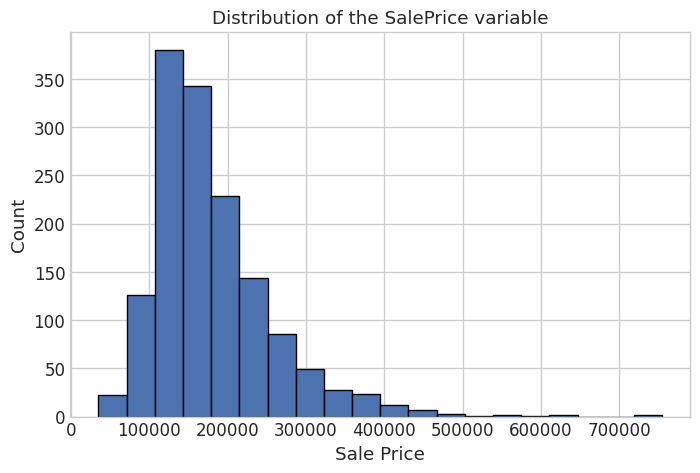

In [897]:
# Set the style and figure size
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(8, 5))

# Create a histogram
plt.hist(housing_df['SalePrice'], bins=20, alpha=1, color='b', edgecolor='black')

# Add labels and a title
plt.xlabel('Sale Price')
plt.ylabel('Count')
plt.title('Distribution of the SalePrice variable')

# Show the plot
plt.show()



 mu = 180921.20 and sigma = 79415.29



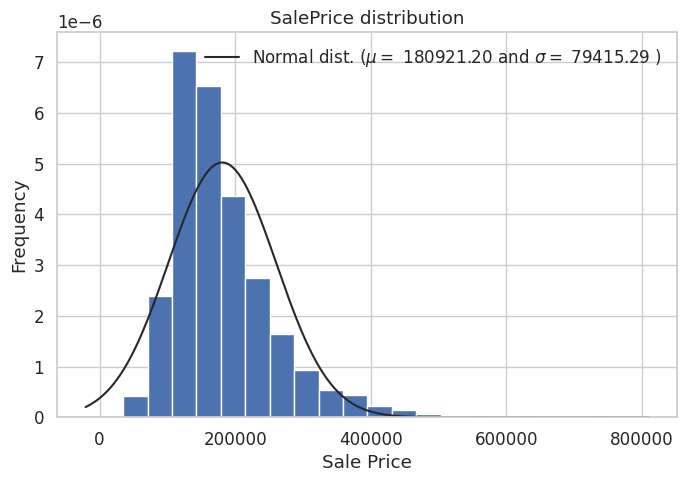

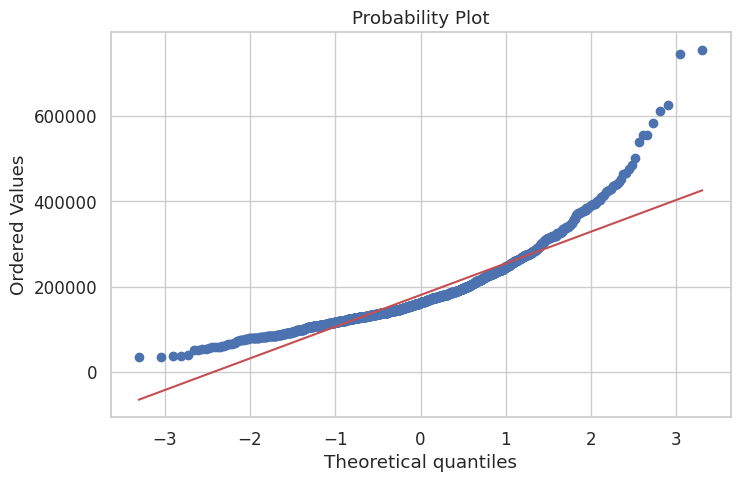

In [898]:
# Plot the distribution using seaborn distplot
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(housing_df['SalePrice'], fit=stats.norm, kde=False, bins=20, hist_kws={"alpha": 1})
plt.title('SalePrice distribution')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')

# Estimate mu and sigma using scipy's norm.fit function
(mu, sigma) = stats.norm.fit(housing_df['SalePrice'])
print('\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# Add legend with distribution parameters
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')

# Plot the QQ-plot
fig = plt.figure()
stats.probplot(housing_df['SalePrice'], plot=plt)
plt.show()

**Based on the previous analysis, it is evident that the distribution of the target variable is right skewed. To address this skewness and achieve a more symmetrical distribution, we should consider applying a log transformation to the variable**

### Log-transformation of the target variable



 mu = 180921.20 and sigma = 79415.29



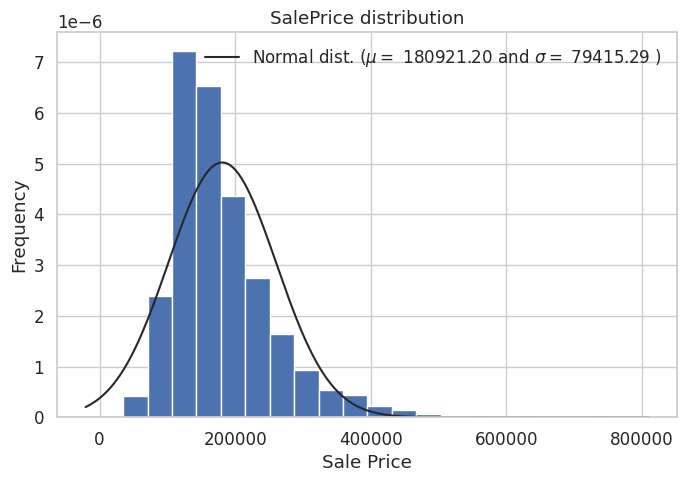

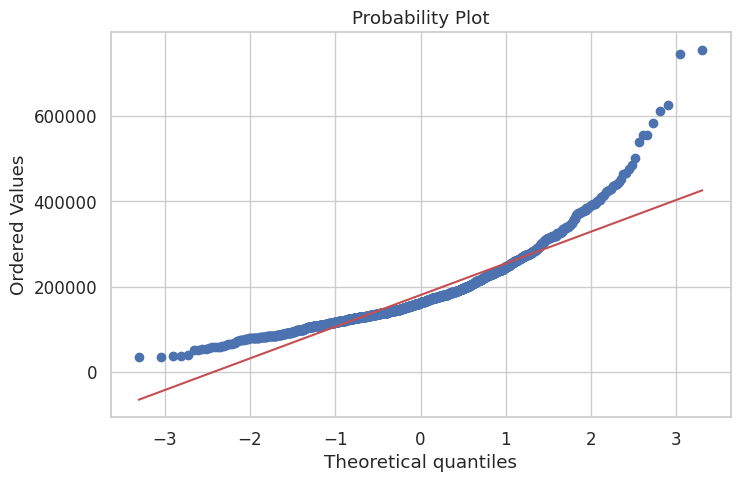

In [899]:

#Plot the distribution using seaborn distplot
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(housing_df['SalePrice'], fit=stats.norm, kde=False, bins=20, hist_kws={"alpha": 1})
plt.title('SalePrice distribution')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')

# Estimate mu and sigma using scipy's norm.fit function
(mu, sigma) = stats.norm.fit(housing_df['SalePrice'])
print('\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# Add legend with distribution parameters
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')

# Plot the QQ-plot
fig = plt.figure()
stats.probplot(housing_df['SalePrice'], plot=plt)
plt.show()

### 4.2 Dummy creation for categorical columns

In [900]:
# Select columns from the DataFrame 'housing_df' that have data type 'object'
housing_df_categorical = housing_df.select_dtypes(include='object')

# 'housing_df_categorical' now contains only the categorical columns from 'housing_df'
housing_df_categorical

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,SBrkr,TA,Min1,Attchd,Unf,TA,TA,Y,WD,Normal
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,FuseA,Gd,Typ,Attchd,Unf,TA,TA,Y,WD,Normal


In [901]:
#shape of categorical variable 
housing_df_categorical.columns.shape

(37,)

In [902]:
# Create dummy variables from the categorical DataFrame 'housing_df_categorical'
# The 'drop_first=True' argument drops the first category in each original categorical column to avoid multicollinearity.
housing_df_dummies = pd.get_dummies(housing_df_categorical, drop_first=True)

# 'housing_df_dummies' now contains the dummy variables representing the categorical data.
housing_df_dummies

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,False,False,True,False,True,False,False,True,False,False,...,False,False,False,False,True,False,False,False,True,False
1,False,False,True,False,True,False,False,True,False,False,...,False,False,False,False,True,False,False,False,True,False
2,False,False,True,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
3,False,False,True,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,False,False,True,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,True,False,True,False,False,True,False,False,...,False,False,False,False,True,False,False,False,True,False
1456,False,False,True,False,True,False,False,True,False,False,...,False,False,False,False,True,False,False,False,True,False
1457,False,False,True,False,True,False,False,True,False,False,...,False,False,False,False,True,False,False,False,True,False
1458,False,False,True,False,True,False,False,True,False,False,...,False,False,False,False,True,False,False,False,True,False


In [903]:
# Drop the columns containing categorical data from the DataFrame 'housing_df'
housing_df.drop(list(housing_df_categorical.columns), axis=1, inplace=True)

# 'housing_df' now contains only the non-categorical columns.
housing_df

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,Age
0,60,65.0,8450,7,5,196.0,706,0,150,856,...,548,0,61,0,0,0,0,0,208500,5
1,20,80.0,9600,6,8,0.0,978,0,284,1262,...,460,298,0,0,0,0,0,0,181500,31
2,60,68.0,11250,7,5,162.0,486,0,434,920,...,608,0,42,0,0,0,0,0,223500,6
3,70,60.0,9550,7,5,0.0,216,0,540,756,...,642,0,35,272,0,0,0,0,140000,36
4,60,84.0,14260,8,5,350.0,655,0,490,1145,...,836,192,84,0,0,0,0,0,250000,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,0.0,0,0,953,953,...,460,0,40,0,0,0,0,0,175000,7
1456,20,85.0,13175,6,6,119.0,790,163,589,1542,...,500,349,0,0,0,0,0,0,210000,22
1457,70,66.0,9042,7,9,0.0,275,0,877,1152,...,252,0,60,0,0,0,0,2500,266500,4
1458,20,68.0,9717,5,6,0.0,49,1029,0,1078,...,240,366,0,112,0,0,0,0,142125,14


In [904]:
# Get the shape of the DataFrame 'housing_df'
housing_df.shape

(1460, 34)

In [905]:
# Concatenate the original DataFrame 'housing_df' and the DataFrame 'housing_df_dummies'
housing_df = pd.concat([housing_df, housing_df_dummies], axis=1)

# 'housing_df' now contains the original columns and the additional dummy variables.
housing_df

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,196.0,706,0,150,856,...,False,False,False,False,True,False,False,False,True,False
1,20,80.0,9600,6,8,0.0,978,0,284,1262,...,False,False,False,False,True,False,False,False,True,False
2,60,68.0,11250,7,5,162.0,486,0,434,920,...,False,False,False,False,True,False,False,False,True,False
3,70,60.0,9550,7,5,0.0,216,0,540,756,...,False,False,False,False,True,False,False,False,False,False
4,60,84.0,14260,8,5,350.0,655,0,490,1145,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,0.0,0,0,953,953,...,False,False,False,False,True,False,False,False,True,False
1456,20,85.0,13175,6,6,119.0,790,163,589,1542,...,False,False,False,False,True,False,False,False,True,False
1457,70,66.0,9042,7,9,0.0,275,0,877,1152,...,False,False,False,False,True,False,False,False,True,False
1458,20,68.0,9717,5,6,0.0,49,1029,0,1078,...,False,False,False,False,True,False,False,False,True,False


In [906]:
housing_df.shape

(1460, 236)

# 5. Data Modeling 

## 5.1 Split data frame into train and test sets

In [907]:
# Split the DataFrame 'housing_df' into two separate DataFrames: 'housing_df_train' and 'housing_df_test'.
# The 'train_size' parameter specifies the proportion of the data to include in the training set (70% in this case).
# The 'test_size' parameter specifies the proportion of the data to include in the testing set (30% in this case).
# The 'random_state' parameter sets the seed for the random number generator, ensuring reproducibility.

housing_df_train, housing_df_test = train_test_split(housing_df, train_size=0.7, test_size=0.3, random_state=42)

In [908]:
# Get the Train shape'housing_df_train'
housing_df_train.shape


(1021, 236)

In [909]:
# Get the Test shape'housing_df_test'
housing_df_test.shape

(438, 236)

### 5.2 Scaling the train dataset

In [910]:
# Instantiate a StandardScaler object
scaler = StandardScaler()

# Select the numeric columns in the DataFrames
numeric_columns = housing_df.select_dtypes(exclude='object').columns

# Standardize the numeric columns in the training set ('housing_df_train')
housing_df_train[numeric_columns] = scaler.fit_transform(housing_df_train[numeric_columns])

# Standardize the numeric columns in the testing set ('housing_df_test')
housing_df_test[numeric_columns] = scaler.transform(housing_df_test[numeric_columns])

In [911]:
housing_df_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
135,-0.868006,0.428201,-0.031106,0.636468,0.391626,1.061006,-0.971407,-0.280483,1.647353,0.546680,...,-0.031311,-0.054286,-0.299412,-0.031311,0.380288,-0.062715,-0.070152,-0.130124,0.461074,-0.30135
1452,2.885732,-1.525298,-0.624789,-0.822194,-0.508937,-0.144469,0.218347,-0.280483,-1.281026,-1.145636,...,-0.031311,-0.054286,-0.299412,-0.031311,0.380288,-0.062715,-0.070152,-0.130124,0.461074,-0.30135
762,0.070429,0.080912,-0.186479,0.636468,-0.508937,-0.608113,-0.919206,-0.280483,0.362819,-0.678405,...,-0.031311,-0.054286,-0.299412,-0.031311,-2.629587,-0.062715,-0.070152,-0.130124,0.461074,-0.30135
932,-0.868006,0.601845,0.081010,2.095130,-0.508937,1.142144,-0.971407,-0.280483,2.997013,1.890249,...,-0.031311,-0.054286,-0.299412,-0.031311,0.380288,-0.062715,-0.070152,-0.130124,0.461074,-0.30135
435,0.070429,-1.178009,-0.007535,0.636468,0.391626,-0.608113,-0.134012,1.994578,-1.123828,-0.582276,...,-0.031311,18.421003,-0.299412,-0.031311,-2.629587,-0.062715,-0.070152,-0.130124,0.461074,-0.30135


In [912]:
housing_df_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
892,-0.868006,-0.005910,-0.206430,-0.092863,2.192751,-0.608113,0.470653,-0.280483,-0.391733,-0.001031,...,-0.031311,-0.054286,-0.299412,-0.031311,0.380288,-0.062715,-0.070152,-0.130124,0.461074,-0.30135
1105,0.070429,1.209600,0.132742,1.365799,-0.508937,1.489877,1.273247,-0.280483,-0.313134,0.902134,...,-0.031311,-0.054286,-0.299412,-0.031311,0.380288,-0.062715,-0.070152,-0.130124,0.461074,-0.30135
413,-0.633397,-0.613665,-0.158229,-0.822194,0.391626,-0.608113,-0.971407,-0.280483,0.982629,-0.115045,...,-0.031311,-0.054286,-0.299412,-0.031311,0.380288,-0.062715,-0.070152,-0.130124,0.461074,-0.30135
522,-0.164180,-0.874132,-0.507818,-0.092863,1.292189,-0.608113,-0.103561,-0.280483,0.077616,-0.123987,...,-0.031311,-0.054286,-0.299412,-0.031311,0.380288,-0.062715,-0.070152,-0.130124,0.461074,-0.30135
1036,-0.868006,0.818900,0.189418,2.095130,-0.508937,-0.202424,1.251497,-0.280483,0.061896,1.253116,...,-0.031311,-0.054286,-0.299412,-0.031311,0.380288,-0.062715,-0.070152,-0.130124,0.461074,-0.30135


### 5.2 Divide train set into X and Y, dependent and indepedent variable 

In [913]:
# 'y_train' will contain the target variable, which is 'SalePrice' in this case.
y_train = housing_df_train.pop('SalePrice')

# 'X_train' will contain the remaining features used for training the model.
X_train = housing_df_train

In [914]:
# 'y_test' will contain the target variable for testing, which is 'SalePrice' in this case.
y_test = housing_df_test.pop('SalePrice')

# 'X_test' will contain the remaining features used for testing or evaluation.
X_test = housing_df_test

### 5.3 RFE Technique

**Recursive Feature Elimination (RFE) is a feature selection technique that recursively removes the least important features until a desired number of features is reached**

In [915]:
# Instantiate a LinearRegression model
lm = LinearRegression()  # Instantiating

# Fit the model to the training data
lm.fit(X_train, y_train)

LinearRegression()

In [916]:
# Display the coefficients of the Linear Regression model
lm.coef_;
print(lm.coef_)

# Display the intercept of the Linear Regression model
lm.intercept_;  
print(lm.intercept_)

[ 2.76075576e-02  1.35897109e-02  8.33325547e-02  1.38883408e-01
  6.44946722e-02  2.70030649e-02  3.33164626e+11  1.09570589e+11
  3.22685062e+11 -3.24147769e+11 -3.01497689e+11 -3.41470529e+11
 -3.71287322e+10  4.11149240e+11  1.62658731e-02 -6.05123437e-03
  3.88360890e-02  1.66255361e-02 -2.91250865e-02 -4.59074560e-02
  3.80071329e-02  2.86338018e-02  9.67373042e-03  2.06182798e-02
  8.84831467e-02  2.11558214e-02 -4.83892232e-03 -6.59655761e-03
  1.86192278e-02  2.05895210e-02  5.53407741e-02 -1.43849404e-02
 -4.10248073e-02  9.05380249e-02  3.13148499e-02  1.19628906e-01
  1.19873047e-01  1.91154480e-02  7.12585449e-03  7.36236572e-03
  8.74328613e-03  3.51104736e-02 -1.65023804e-02  2.30102539e-02
 -1.05161667e-02  3.11965942e-02 -2.05812454e-02 -1.80053711e-02
 -1.87683105e-03  1.14364624e-02 -3.78913879e-02 -5.07545471e-03
 -1.35879517e-02 -4.47082520e-02 -2.23474503e-02 -4.84313965e-02
 -1.70898438e-03 -9.25827026e-02 -3.21807861e-02 -6.05392456e-02
 -2.38952637e-02 -5.83801

In [917]:
# Create a LinearRegression estimator
lm = LinearRegression()  

# Initialize RFE with your estimator and the desired number of features
rfe = RFE(estimator=lm, n_features_to_select=95)  
# Fit RFE to your training data
rfe.fit(X_train, y_train) 

# True or False values indicating which features were selected      #True or False   
print(rfe.support_)  
print(rfe.ranking_)

[False False  True  True  True  True  True  True  True  True  True  True
  True  True  True False  True False  True  True  True  True False  True
  True False False False False False  True False  True  True False False
 False False False False False  True False False False  True False False
 False False False False False False False False False  True False  True
 False  True  True False  True  True  True  True False False False False
  True False False False  True False False False False False False False
 False  True  True False False  True False  True  True  True False  True
 False False False False False False False False False False  True  True
  True  True  True  True  True False False False  True False  True  True
 False  True False False  True  True False False False  True  True False
 False  True False False False False False  True  True False False  True
  True False False False False  True  True False False False  True  True
  True  True False  True False  True  True False  T

In [918]:
# Get the column names from 'X_train' where the RFE support mask is True
columns = X_train.columns[rfe.support_]

# 'columns' now contains the names of the selected features
columns

Index(['LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'PoolArea', 'Age', 'MSZoning_FV', 'LandContour_HLS',
       'LotConfig_CulDSac', 'Neighborhood_Edwards', 'Neighborhood_IDOTRR',
       'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NWAmes',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown',
       'Neighborhood_StoneBr', 'Condition1_Norm', 'Condition2_PosA',
       'Condition2_PosN', 'Condition2_RRNn', 'BldgType_Duplex',
       'BldgType_Twnhs', 'BldgType_TwnhsE', 'HouseStyle_1Story',
       'RoofMatl_CompShg', 'RoofMatl_Membran', 'RoofMatl_Metal',
       'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake',
       'RoofMatl_WdShngl', 'Exterior1st_CBlock', 'Exterior1st_HdBoard',
 

In [919]:
# Features which can be excluded to make the model according to RFE
X_train.columns[~rfe.support_]

Index(['MSSubClass', 'LotFrontage', 'BsmtHalfBath', 'HalfBath', 'GarageYrBlt',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch',
       ...
       'SaleType_Con', 'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw',
       'SaleType_Oth', 'SaleType_WD', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal'],
      dtype='object', length=140)

In [920]:
# Creating an X_train dataframe to build the first model with features selected by RFE technique
X_train_rfe1 =X_train[col]

In [921]:
# Add a constant (intercept) column to the DataFrame 'X_train_rfe1'
X_train_rfe1 = sm.add_constant(X_train_rfe1)  # Adding Constant

# Display the first few rows of the modified DataFrame
X_train_rfe1.head()

,const,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,SaleType_New,SaleCondition_Partial
135,1.0,-0.031106,0.636468,0.391626,1.061006,-0.971407,-0.280483,1.647353,0.546680,1.316609,...,-0.236311,-0.031311,0.333152,-0.16165,-0.088867,-0.236311,-0.054286,0.316568,-0.299412,-0.30135
1452,1.0,-0.624789,-0.822194,-0.508937,-0.144469,0.218347,-0.280483,-1.281026,-1.145636,-0.250050,...,-0.236311,-0.031311,0.333152,-0.16165,-0.088867,-0.236311,-0.054286,0.316568,-0.299412,-0.30135
762,1.0,-0.186479,0.636468,-0.508937,-0.608113,-0.919206,-0.280483,0.362819,-0.678405,-1.041084,...,-0.236311,-0.031311,0.333152,-0.16165,-0.088867,-0.236311,-0.054286,0.316568,-0.299412,-0.30135
932,1.0,0.081010,2.095130,-0.508937,1.142144,-0.971407,-0.280483,2.997013,1.890249,1.889338,...,-0.236311,-0.031311,0.333152,-0.16165,-0.088867,-0.236311,-0.054286,0.316568,-0.299412,-0.30135
435,1.0,-0.007535,0.636468,0.391626,-0.608113,-0.134012,1.994578,-1.123828,-0.582276,-0.879282,...,-0.236311,-0.031311,0.333152,-0.16165,-0.088867,-0.236311,-0.054286,0.316568,-0.299412,-0.30135


In [922]:
# Fit an OLS linear regression model using 'X_train_rfe1' as features and 'y_train' as the target variable
lm1 = sm.OLS(y_train, X_train_rfe1).fit()

# Print a summary of the regression results
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     138.1
Date:                Wed, 27 Sep 2023   Prob (F-statistic):               0.00
Time:                        14:37:40   Log-Likelihood:                -148.99
No. Observations:                1021   AIC:                             460.0
Df Residuals:                     940   BIC:                             859.2
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2.336e-

### The Linear regression model constructed using 95 columns identified by the RFE technique achieved an accuracy of 92.5% (as measured by the Adjusted R-squared). However, it exhibits multicollinearity issues due to infinite VIF values, despite the high accuracy. This indicates that although the model performs well, it contains numerous highly correlated features

In [923]:
# Calculate the VIFs for the new model
# Create an empty DataFrame to store the VIFs
vif = pd.DataFrame()
# Assign the column names (features) from 'X_train_rfe1' to the 'Features' column in the 'vif' DataFrame
vif['Features'] = X_train_rfe1.columns

# Calculate the VIF for each feature and store it in the 'VIF' column
# This loop iterates through each column in 'X_train_rfe1' and calculates its VIF
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
# Round the VIF values to two decimal places for readability
vif['VIF'] = round(vif['VIF'],2)
# 'vif' now contains the calculated VIF values for each feature
vif

,Features,VIF
0,const,1.00
1,LotArea,1.44
2,OverallQual,4.17
3,OverallCond,1.64
4,MasVnrArea,1.83
5,BsmtFinSF1,inf
6,BsmtFinSF2,inf
7,BsmtUnfSF,inf
8,TotalBsmtSF,inf
9,1stFlrSF,inf


In [924]:
#Print Columns selected by RFE. We will manually eliminate for these columns
X_train.columns[rfe.support_]

Index(['LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'PoolArea', 'Age', 'MSZoning_FV', 'LandContour_HLS',
       'LotConfig_CulDSac', 'Neighborhood_Edwards', 'Neighborhood_IDOTRR',
       'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NWAmes',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown',
       'Neighborhood_StoneBr', 'Condition1_Norm', 'Condition2_PosA',
       'Condition2_PosN', 'Condition2_RRNn', 'BldgType_Duplex',
       'BldgType_Twnhs', 'BldgType_TwnhsE', 'HouseStyle_1Story',
       'RoofMatl_CompShg', 'RoofMatl_Membran', 'RoofMatl_Metal',
       'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake',
       'RoofMatl_WdShngl', 'Exterior1st_CBlock', 'Exterior1st_HdBoard',
 

**5.4 Linear Regression **

In [925]:
#we are trying with the basic linear regression model and see the r2_score as the metric

# Instantiate a Linear Regression model
lr = LinearRegression()

# Fit the model to the training data
lr.fit(X_train, y_train)

# Predict the target variable for the training data
y_train_pred = lr.predict(X_train)

# Predict the target variable for the testing data
y_test_pred = lr.predict(X_test)

# Calculate the R-squared (coefficient of determination) for the training dataset
r2_train = r2_score(y_train, y_train_pred)

# Calculate the R-squared for the testing dataset
r2_test = r2_score(y_test, y_test_pred)

# Print the R-squared values for the training dataset
print(f"R-squared, r2_train of the Linear Regression model is: {round(r2_train*100, 2)}%")

R-squared, r2_train of the Linear Regression model is: 93.27%


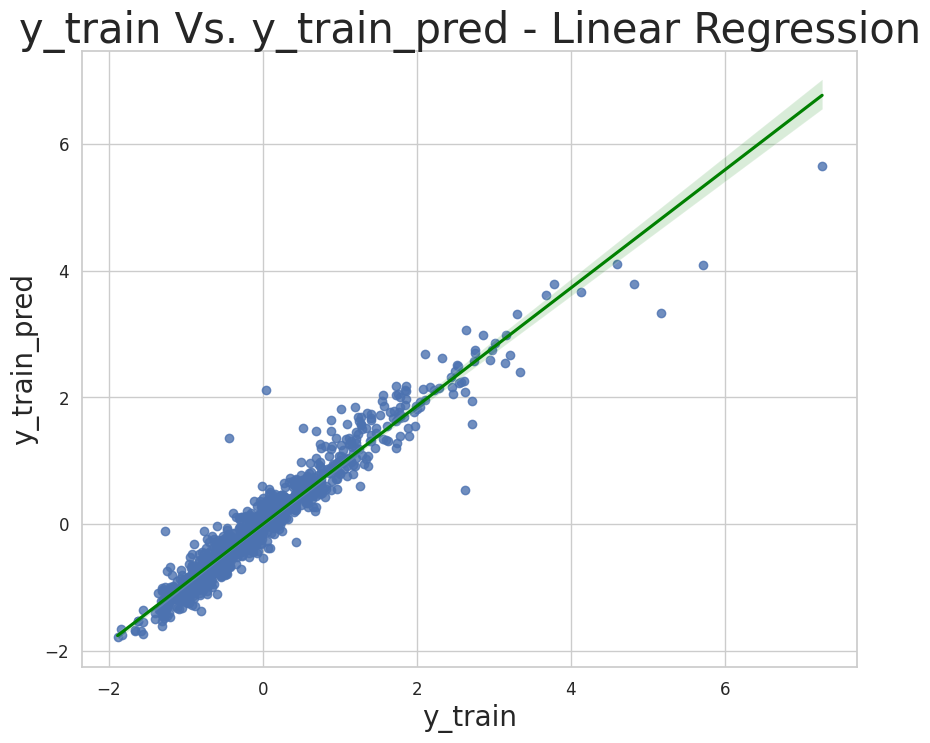

In [926]:
# Visualising y_train vs y_train_pred
# Create a figure for the plot with a specified size
plt.figure(figsize=(10, 8))

# Create a scatter plot of 'y_train' vs. 'y_train_pred'
reg_plot = sns.regplot(x=y_train, y=y_train_pred, line_kws={'color': 'green'})

# Set the title of the plot
plt.title('y_train Vs. y_train_pred - Linear Regression', fontdict={'fontsize': 30})

# Label the x-axis
plt.xlabel('y_train', fontdict={'fontsize': 20})

# Label the y-axis
plt.ylabel('y_train_pred', fontdict={'fontsize': 20})

# Display the plot
plt.show()

# **6. Advanced Regression**

**Regularization is a technique employed to find the right level of model complexity—making it as simple as possible while still maintaining good performance on the training data. It aims to achieve a balance where the model is straightforward yet sufficiently capable to be practically valuable**

## **Ridge Regression**

**Ridge Regression is a regularization technique that adds a penalty term to the linear regression cost function to prevent overfitting**

In [927]:
# Assume alpha is 0.001 and create a Ridge regression model
ridge = Ridge(alpha=0.001)

# Fit the Ridge regression model to the training data
ridge.fit(X_train, y_train)

# Predict the target variable for the training data
y_train_pred = ridge.predict(X_train)

# Calculate and print the R-squared (coefficient of determination) score for the training data
print(r2_score(y_train, y_train_pred))


0.9327495269684768


In [928]:
# Hyperparameter tuning: Define a list of alpha values to test
alpha_values = [0.001, 0.01, 0.5, 1.0, 10.0, 50, 100, 500, 1000]

# Initialize a Ridge regression model
ridge_model = Ridge()

# Cross-validation setup
folds = 5
param_grid = {'alpha': alpha_values}
scoring_metric = 'neg_mean_absolute_error'

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=ridge_model,
                           param_grid=param_grid,
                           scoring=scoring_metric,
                           cv=folds,
                           return_train_score=True,
                           verbose=1)

# Fit the model using GridSearchCV
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.5, 1.0, 10.0, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [929]:
# Create a DataFrame 'cross_validation_results' to store the cross-validation results
cross_validation_results = pd.DataFrame(grid_search.cv_results_)

# Display the first few rows of the 'cross_validation_results' DataFrame
cross_validation_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.075184,0.019671,0.034769,0.013625,0.001,{'alpha': 0.001},-0.226771,-0.292737,-0.261639,-0.231053,...,-0.270522,0.042258,9,-0.161371,-0.160633,-0.158576,-0.170539,-0.161061,-0.162436,0.004167
1,0.068332,0.014756,0.040710,0.013701,0.01,{'alpha': 0.01},-0.226799,-0.292731,-0.261396,-0.231014,...,-0.270426,0.042196,8,-0.161378,-0.160629,-0.158568,-0.170548,-0.161082,-0.162441,0.004171
2,0.063077,0.011872,0.035139,0.010704,0.5,{'alpha': 0.5},-0.228504,-0.292391,-0.253000,-0.230152,...,-0.266844,0.039169,7,-0.161926,-0.160806,-0.158629,-0.171392,-0.162488,-0.163048,0.004376
3,0.063913,0.014507,0.038771,0.012360,1.0,{'alpha': 1.0},-0.230054,-0.292111,-0.249492,-0.230860,...,-0.265021,0.036548,6,-0.162752,-0.161268,-0.158759,-0.172231,-0.164204,-0.163843,0.004564
4,0.062998,0.013659,0.034789,0.013289,10.0,{'alpha': 10.0},-0.242204,-0.293013,-0.241313,-0.243264,...,-0.259394,0.021583,5,-0.173172,-0.163825,-0.168258,-0.182046,-0.182277,-0.173916,0.007354


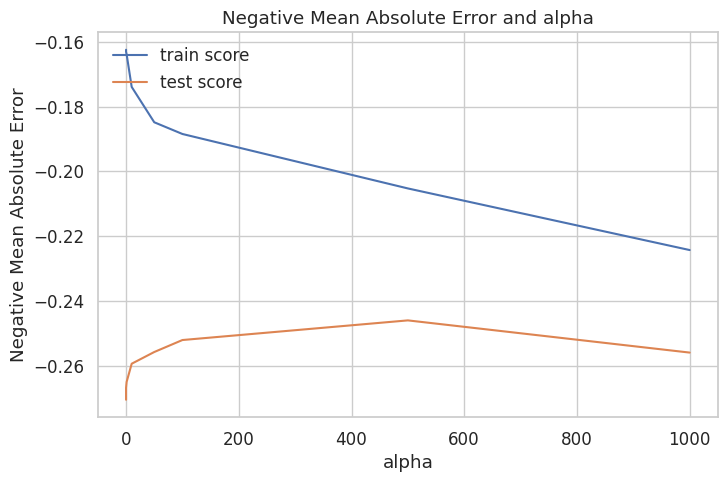

In [930]:
# Convert 'param_alpha' to int32 data type
cross_validation_results['param_alpha'] = cross_validation_results['param_alpha'].astype('int32')

# Define the x-axis and y-axis data
alphas = cross_validation_results['param_alpha']
mean_train_scores = cross_validation_results['mean_train_score']
mean_test_scores = cross_validation_results['mean_test_score']

# Create the plot
plt.plot(alphas, mean_train_scores, label='train score')
plt.plot(alphas, mean_test_scores, label='test score')

# Set labels and title
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")

# Add a legend to the plot
plt.legend(loc='upper left')

# Display the plot
plt.show()


## Inferences: 

### We observe that the optimal alpha value falls within the range of 0 to 20. Therefore, we will select our parameters accordingly based on this range

In [931]:
# Create a list of alpha values to tune
alpha_values = [0.0001, 0.001, 0.01, 0.05, 0.1, 
                0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 
                2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 
                20, 50, 100, 500, 1000]

# Initialize the Ridge regression model
ridge_model = Ridge()

# Configure cross-validation
num_folds = 5
param_grid = {'alpha': alpha_values}
scoring_metric = 'neg_mean_absolute_error'

# Create a GridSearchCV object
grid_search_cv = GridSearchCV(estimator=ridge_model,
                              param_grid=param_grid,
                              scoring=scoring_metric,
                              cv=num_folds,
                              return_train_score=True,
                              verbose=1)

# Fit the model using GridSearchCV
grid_search_cv.fit(X_train, y_train)


Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [932]:
# Create a DataFrame 'cross_validation_results' to store the cross-validation results
cross_validation_results = pd.DataFrame(grid_search.cv_results_)

# Display the first few rows of the 'cross_validation_results' DataFrame
cross_validation_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.075184,0.019671,0.034769,0.013625,0.001,{'alpha': 0.001},-0.226771,-0.292737,-0.261639,-0.231053,...,-0.270522,0.042258,9,-0.161371,-0.160633,-0.158576,-0.170539,-0.161061,-0.162436,0.004167
1,0.068332,0.014756,0.040710,0.013701,0.01,{'alpha': 0.01},-0.226799,-0.292731,-0.261396,-0.231014,...,-0.270426,0.042196,8,-0.161378,-0.160629,-0.158568,-0.170548,-0.161082,-0.162441,0.004171
2,0.063077,0.011872,0.035139,0.010704,0.5,{'alpha': 0.5},-0.228504,-0.292391,-0.253000,-0.230152,...,-0.266844,0.039169,7,-0.161926,-0.160806,-0.158629,-0.171392,-0.162488,-0.163048,0.004376
3,0.063913,0.014507,0.038771,0.012360,1.0,{'alpha': 1.0},-0.230054,-0.292111,-0.249492,-0.230860,...,-0.265021,0.036548,6,-0.162752,-0.161268,-0.158759,-0.172231,-0.164204,-0.163843,0.004564
4,0.062998,0.013659,0.034789,0.013289,10.0,{'alpha': 10.0},-0.242204,-0.293013,-0.241313,-0.243264,...,-0.259394,0.021583,5,-0.173172,-0.163825,-0.168258,-0.182046,-0.182277,-0.173916,0.007354


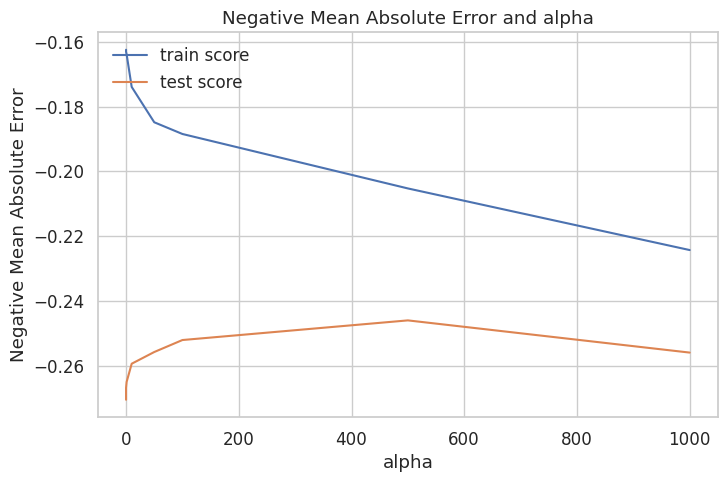

In [933]:
# Convert 'param_alpha' to int32 data type
cross_validation_results['param_alpha'] = cross_validation_results['param_alpha'].astype('int32')

# Define the x-axis and y-axis data
alphas = cross_validation_results['param_alpha']
mean_train_scores = cross_validation_results['mean_train_score']
mean_test_scores = cross_validation_results['mean_test_score']

# Create the plot
plt.plot(alphas, mean_train_scores, label='train score')
plt.plot(alphas, mean_test_scores, label='test score')

# Set labels and title
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")

# Add a legend to the plot
plt.legend(loc='upper left')

# Display the plot
plt.show()

## Inferences: 

### We observe that the optimal alpha value falls within the range of 0 to 2. Therefore, we will select our parameters accordingly based on this range

In [934]:
# Print the best estimator (Ridge model with the best alpha value)
print(grid_search_cv.best_estimator_)

# Get the best negative mean absolute error (MAE) score
best_ridge_score = grid_search_cv.best_score_

# Get the best alpha value
best_ridge_alpha = grid_search_cv.best_params_["alpha"]

# Display the best R-squared score and its corresponding alpha value
print("The best R-squared score is obtained at alpha {0}".format(best_ridge_alpha))

Ridge(alpha=500)
The best R-squared score is obtained at alpha 500


## Building ridge regression model with optimal alpha value

In [935]:
# Model building using optimal alpha
# ridge = Ridge(alpha=best_ridge_alpha)  # Using the optimal alpha (commented out)
ridge = Ridge(alpha=1.0)  # Using alpha equal to 1.0

# Fit the Ridge Regression model to the training data
ridge.fit(X_train, y_train)

Ridge()

In [936]:
# Extract the coefficients and intercept from the Ridge model
coefficients = [ridge.intercept_] + list(ridge.coef_)

# Create a DataFrame to store the coefficients and corresponding features
ridge_coef = pd.DataFrame({'Features': ['const'] + list(housing_df_train.columns),
                           'Coefficient': coefficients,
                           'Mod': [abs(ele) for ele in coefficients]})

# Display the coefficients DataFrame
ridge_coef


,Features,Coefficient,Mod
0,const,2.221483e-17,2.221483e-17
1,MSSubClass,1.730763e-02,1.730763e-02
2,LotFrontage,9.305387e-03,9.305387e-03
3,LotArea,8.215697e-02,8.215697e-02
4,OverallQual,1.430342e-01,1.430342e-01
5,OverallCond,6.462615e-02,6.462615e-02
6,MasVnrArea,2.556468e-02,2.556468e-02
7,BsmtFinSF1,9.760734e-02,9.760734e-02
8,BsmtFinSF2,1.618613e-02,1.618613e-02
9,BsmtUnfSF,6.022510e-03,6.022510e-03


## Inferences:

**From above observation, it is evidant that we are finding the absolute value of coefficient because negative coefficient is also as important as positive one and conveys that the vairbale is negatively related to the target variable Sale price ." For instance we just find the top 10 coefficents then 0.00 will be more important than a variable with -0.1 coefficent. but in relaility the variable with -0.1 is more important to predict saleprice rather than 0.0 because 0.0 shows that that variable can be excluded and is insignificant where as -0.1 shows that the variable is needed to predict the Sale price**

In [937]:
# selecting the top 10 variables

sorted_coef = ridge_coef.sort_values(by='Mod', ascending=False)

# Display the top 10 rows of the sorted DataFrame
# This shows the top 10 features (variables) with the largest absolute coefficients.
top_10_features = sorted_coef.head(10)
top_10_features

,Features,Coefficient,Mod
107,RoofMatl_CompShg,1.011371,1.011371
111,RoofMatl_Tar&Grv,0.699450,0.699450
113,RoofMatl_WdShngl,0.484290,0.484290
215,GarageQual_TA,-0.417381,0.417381
112,RoofMatl_WdShake,0.408655,0.408655
220,GarageCond_TA,0.378287,0.378287
211,GarageQual_Fa,-0.251640,0.251640
109,RoofMatl_Metal,0.246862,0.246862
110,RoofMatl_Roll,0.235247,0.235247
216,GarageCond_Fa,0.206193,0.206193


In [938]:
# Predict the target variable for the training data using the Ridge Regression model
y_train_ridge_pred = ridge.predict(X_train)

# Calculate and print the R-squared for the training dataset
# R-squared measures how well the model explains the variance in the target variable.
print("Ridge regression train r2: ", round(metrics.r2_score(y_true=y_train, y_pred=y_train_ridge_pred), 4))

# Predict the target variable for the testing data using the Ridge Regression model
y_test_ridge_pred = ridge.predict(X_test)

# Calculate and print the R-squared for the testing dataset
# This provides an assessment of how well the model generalizes to unseen data.
print("Ridge regression test r2: ", round(metrics.r2_score(y_true=y_test, y_pred=y_test_ridge_pred), 4))

Ridge regression train r2:  0.9322
Ridge regression test r2:  0.7676


## Lasso Regression

**Lasso Regression is a linear regression technique that adds a penalty term to the linear regression cost function, aiming to minimize the absolute values of the coefficients.**

In [939]:
# Hyperparameter tuning: Define a list of alpha values to test
alpha_values = [0.0001, 0.001, 0.01, 0.05, 0.1, 
                0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 
                2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 
                20, 50, 100]

# Initialize a Lasso regression model
lasso_model = Lasso()

# Cross-validation setup
num_folds = 5
param_grid = {'alpha': alpha_values}
scoring_metric = 'neg_mean_absolute_error'

# Create a GridSearchCV object
grid_search_cv = GridSearchCV(estimator=lasso_model,
                              param_grid=param_grid,
                              scoring=scoring_metric,
                              cv=num_folds,
                              return_train_score=True,
                              verbose=1)

# Fit the model using GridSearchCV
grid_search_cv.fit(X_train, y_train)


Fitting 5 folds for each of 26 candidates, totalling 130 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [940]:
# Create a DataFrame 'cross_validation_results' to store the cross-validation results
cross_validation_results = pd.DataFrame(grid_search.cv_results_)

# Display the first few rows of the 'cross_validation_results' DataFrame
cross_validation_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.075184,0.019671,0.034769,0.013625,0.001,{'alpha': 0.001},-0.226771,-0.292737,-0.261639,-0.231053,...,-0.270522,0.042258,9,-0.161371,-0.160633,-0.158576,-0.170539,-0.161061,-0.162436,0.004167
1,0.068332,0.014756,0.040710,0.013701,0.01,{'alpha': 0.01},-0.226799,-0.292731,-0.261396,-0.231014,...,-0.270426,0.042196,8,-0.161378,-0.160629,-0.158568,-0.170548,-0.161082,-0.162441,0.004171
2,0.063077,0.011872,0.035139,0.010704,0.5,{'alpha': 0.5},-0.228504,-0.292391,-0.253000,-0.230152,...,-0.266844,0.039169,7,-0.161926,-0.160806,-0.158629,-0.171392,-0.162488,-0.163048,0.004376
3,0.063913,0.014507,0.038771,0.012360,1.0,{'alpha': 1.0},-0.230054,-0.292111,-0.249492,-0.230860,...,-0.265021,0.036548,6,-0.162752,-0.161268,-0.158759,-0.172231,-0.164204,-0.163843,0.004564
4,0.062998,0.013659,0.034789,0.013289,10.0,{'alpha': 10.0},-0.242204,-0.293013,-0.241313,-0.243264,...,-0.259394,0.021583,5,-0.173172,-0.163825,-0.168258,-0.182046,-0.182277,-0.173916,0.007354


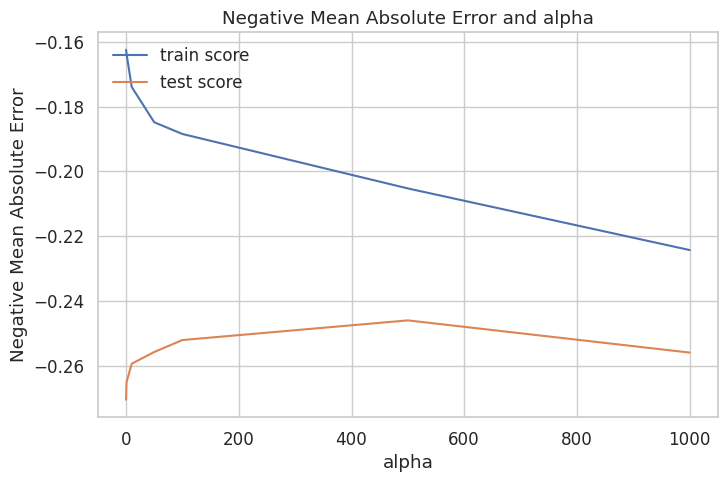

In [941]:
# Define the x-axis and y-axis data
alphas = cross_validation_results['param_alpha']
mean_train_scores = cross_validation_results['mean_train_score']
mean_test_scores = cross_validation_results['mean_test_score']

# Create the plot
plt.plot(alphas, mean_train_scores, label='train score')
plt.plot(alphas, mean_test_scores, label='test score')

# Set labels and title
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")

# Add a legend to the plot
plt.legend(loc='upper left')

# Display the plot
plt.show()

In [942]:
# Define a shorter list of alpha values for hyperparameter tuning
alpha_values = [0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

# Initialize a Lasso regression model
lasso_model = Lasso()

# Set up cross-validation configuration
num_folds = 5
param_grid = {'alpha': alpha_values}
scoring_metric = 'neg_mean_absolute_error'

# Create a GridSearchCV object for hyperparameter tuning
grid_search_cv = GridSearchCV(estimator=lasso_model,
                              param_grid=param_grid,
                              scoring=scoring_metric,
                              cv=num_folds,
                              return_train_score=True,
                              verbose=1)

# Fit the model using GridSearchCV
grid_search_cv.fit(X_train, y_train)


Fitting 5 folds for each of 13 candidates, totalling 65 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [943]:
# Create a DataFrame 'cross_validation_results' to store the cross-validation results
cross_validation_results = pd.DataFrame(grid_search.cv_results_)

# Display the first few rows of the 'cross_validation_results' DataFrame
cross_validation_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.075184,0.019671,0.034769,0.013625,0.001,{'alpha': 0.001},-0.226771,-0.292737,-0.261639,-0.231053,...,-0.270522,0.042258,9,-0.161371,-0.160633,-0.158576,-0.170539,-0.161061,-0.162436,0.004167
1,0.068332,0.014756,0.040710,0.013701,0.01,{'alpha': 0.01},-0.226799,-0.292731,-0.261396,-0.231014,...,-0.270426,0.042196,8,-0.161378,-0.160629,-0.158568,-0.170548,-0.161082,-0.162441,0.004171
2,0.063077,0.011872,0.035139,0.010704,0.5,{'alpha': 0.5},-0.228504,-0.292391,-0.253000,-0.230152,...,-0.266844,0.039169,7,-0.161926,-0.160806,-0.158629,-0.171392,-0.162488,-0.163048,0.004376
3,0.063913,0.014507,0.038771,0.012360,1.0,{'alpha': 1.0},-0.230054,-0.292111,-0.249492,-0.230860,...,-0.265021,0.036548,6,-0.162752,-0.161268,-0.158759,-0.172231,-0.164204,-0.163843,0.004564
4,0.062998,0.013659,0.034789,0.013289,10.0,{'alpha': 10.0},-0.242204,-0.293013,-0.241313,-0.243264,...,-0.259394,0.021583,5,-0.173172,-0.163825,-0.168258,-0.182046,-0.182277,-0.173916,0.007354


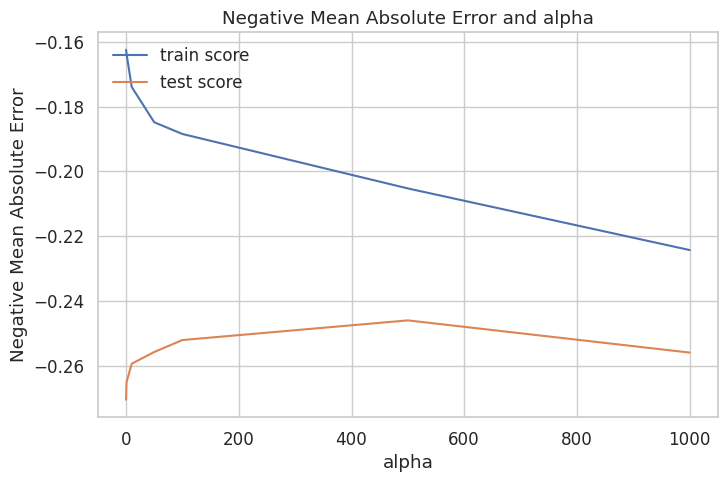

In [944]:
# Define the x-axis and y-axis data
alphas = cross_validation_results['param_alpha']
mean_train_scores = cross_validation_results['mean_train_score']
mean_test_scores = cross_validation_results['mean_test_score']

# Create the plot
plt.plot(alphas, mean_train_scores, label='train score')
plt.plot(alphas, mean_test_scores, label='test score')

# Set labels and title
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")

# Add a legend to the plot
plt.legend(loc='upper left')

# Display the plot
plt.show()

In [945]:
 #Checking the best parameter(Alpha value)
grid_search.best_params_

{'alpha': 500}

### **Building Lasso regression model with optimal alpha value**

In [946]:
# Create a Lasso Regression model with a specific alpha value (0.0001)
lasso = Lasso(alpha=0.0001)

# Fit the Lasso Regression model to the training data
lasso.fit(X_train, y_train)

# Predict the target variable for the training and testing data
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

# Calculate and print the R-squared score for the training dataset
# R-squared measures how well the model explains the variance in the target variable.
print("Lasso Regression train r2:", r2_score(y_true=y_train, y_pred=y_train_pred))

# Calculate and print the R-squared score for the testing dataset
# This provides an assessment of how well the model generalizes to unseen data.
print("Lasso Regression test r2:", r2_score(y_true=y_test, y_pred=y_test_pred))


Lasso Regression train r2: 0.932562577765918
Lasso Regression test r2: 0.7447530345746738


In [947]:
# Extract the coefficients and intercept from the Lasso model
coefficients = [lasso.intercept_] + list(lasso.coef_)

# Create a DataFrame to store the coefficients and corresponding features
lasso_coef = pd.DataFrame({'Features': ['const'] + list(housing_df_train.columns),
                           'Coefficient': coefficients,
                           'Mod': [abs(ele) for ele in coefficients]})

# Display the coefficients DataFrame
lasso_coef

,Features,Coefficient,Mod
0,const,6.514792e-17,6.514792e-17
1,MSSubClass,7.334083e-03,7.334083e-03
2,LotFrontage,1.393036e-02,1.393036e-02
3,LotArea,8.114382e-02,8.114382e-02
4,OverallQual,1.403488e-01,1.403488e-01
5,OverallCond,6.539236e-02,6.539236e-02
6,MasVnrArea,2.637684e-02,2.637684e-02
7,BsmtFinSF1,9.875862e-02,9.875862e-02
8,BsmtFinSF2,1.457816e-02,1.457816e-02
9,BsmtUnfSF,-0.000000e+00,0.000000e+00


In [948]:
sorted_coef = lasso_coef.sort_values(by='Mod', ascending=False)

# Display the top 10 rows of the sorted DataFrame
# This shows the top 10 features (variables) with the largest absolute coefficients.
top_10_features = sorted_coef.head(10)
top_10_features

,Features,Coefficient,Mod
107,RoofMatl_CompShg,1.099691,1.099691
111,RoofMatl_Tar&Grv,0.765782,0.765782
215,GarageQual_TA,-0.545247,0.545247
113,RoofMatl_WdShngl,0.519052,0.519052
220,GarageCond_TA,0.516554,0.516554
112,RoofMatl_WdShake,0.445319,0.445319
211,GarageQual_Fa,-0.324944,0.324944
216,GarageCond_Fa,0.282282,0.282282
109,RoofMatl_Metal,0.268822,0.268822
207,GarageType_None,0.258486,0.258486


# **Conclusion**

* ### We choose the Lasso Regression model as it achieves similar accuracy with fewer variables, making it a more efficient choice compared to the Ridge regression model
* ### Based on the r2_score of the 3 models, we can see that their r2_scores are almost similar, as such it is better to go for the simplest model. In this case it would be better to go with Lasso as it panalizes the variables, and helps in feature selection.
* ### Optimal value of alpha for Ridge regression : 1.0
* ### Optimal value of alpha for Lasso regression : 0.0001


# Inferences:

## Upon examining the above models, it's apparent that there exists minimal correlation between the Residual and Predicted Value, aligning with our model's expectation of displaying no discernible pattern:

## The company wants to know:

### The following variables hold significance in predicting house prices:

### **BsmtFullBath**: A greater BsmtFullBath area corresponds to a higher SalePrice.

### **LotFrontage**: An increase in the linear feet of street connected to the property area results in a higher price.

### **Overall Condition**: Higher SalePrices are associated with properties in excellent overall condition.

### **Garage Area**: Increased garage area leads to higher SalePrices.

### **CentralAir**: A 'Yes' value for CentralAir is correlated with higher SalePrices.

### **MSZoning_RH**: Houses near residential areas command higher SalePrices.

### **Overall Quality**: Properties in excellent overall condition tend to have higher SalePrices.

### **Exterior1st_CBlock**: If the house's Exterior1st is CBlock, the price tends to be lower.

## How well those variables describe the price of a house:

### **These variables offer valuable insights into house pricing and exhibit linear relationships with price, enabling the company to make strategic investment decisions for properties with the potential for higher future SalePrices.**


# Part II - Subjective Questions

### Refer PDF available along with this file